# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Michael Natanael
- **Email:** mnatanael87@gmail.com
- **ID Dicoding:** natanaelmichael

## Menentukan Pertanyaan Bisnis

- Kapan terjadi bike rental tertinggi? Hari apa? Jam berapa?
- Apa faktor yang paling mempengaruhi jumlah bike rental?

## Import Semua Packages/Library yang Digunakan

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [47]:
day_df = pd.read_csv("data/day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [48]:
hour_df = pd.read_csv("data/hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Menilai tabel `day_df`

In [49]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [50]:
# Check missing value
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [51]:
# Check duplicate data
print("Jumlah duplikasi: ", day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [52]:
# Check outlier (temp)
q25, q75 = np.percentile(day_df["temp"], 25), np.percentile(day_df["temp"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["temp"] if x < minimum or x > maximum]

print(f'temp_outliers = {outliers}')

temp_outliers = []


In [53]:
# Check outlier (atemp)
q25, q75 = np.percentile(day_df["atemp"], 25), np.percentile(day_df["atemp"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["atemp"] if x < minimum or x > maximum]

print(f'atemp_outliers = {outliers}')

atemp_outliers = []


In [54]:
# Check outlier (hum)
q25, q75 = np.percentile(day_df["hum"], 25), np.percentile(day_df["hum"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["hum"] if x < minimum or x > maximum]

print(f'hum_outliers = {outliers}')

hum_outliers = [0.187917, 0.0]


In [55]:
# Check outlier (windspeed)
q25, q75 = np.percentile(day_df["windspeed"], 25), np.percentile(day_df["windspeed"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["windspeed"] if x < minimum or x > maximum]

print(f'windspeed_outliers = {outliers}')

windspeed_outliers = [0.417908, 0.507463, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]


#### Menilai tabel `hour_df`

In [56]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [57]:
# Check missing value
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [58]:
# Check duplicate data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [59]:
# Check outlier (temp)
q25, q75 = np.percentile(hour_df["temp"], 25), np.percentile(hour_df["temp"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["temp"] if x < minimum or x > maximum]

print(f'temp_outliers = {outliers}')

temp_outliers = []


In [60]:
# Check outlier (atemp)
q25, q75 = np.percentile(hour_df["atemp"], 25), np.percentile(hour_df["atemp"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["atemp"] if x < minimum or x > maximum]

print(f'atemp_outliers = {outliers}')

atemp_outliers = []


In [61]:
# Check outlier (hum)
q25, q75 = np.percentile(hour_df["hum"], 25), np.percentile(hour_df["hum"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["hum"] if x < minimum or x > maximum]

print(f'hum_outliers = {outliers}')

hum_outliers = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [62]:
# Check outlier (windspeed)
q25, q75 = np.percentile(hour_df["windspeed"], 25), np.percentile(hour_df["windspeed"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["windspeed"] if x < minimum or x > maximum]

print(f'windspeed_outliers = {outliers}')

windspeed_outliers = [0.4925, 0.5522, 0.5224, 0.5224, 0.5821, 0.5224, 0.5821, 0.5821, 0.5224, 0.5224, 0.5522, 0.4925, 0.5522, 0.5224, 0.4925, 0.4925, 0.5522, 0.4925, 0.5224, 0.5821, 0.5224, 0.4925, 0.6567, 0.6119, 0.6119, 0.4925, 0.5224, 0.6567, 0.4925, 0.7761, 0.6866, 0.5224, 0.5821, 0.4925, 0.4925, 0.5224, 0.5821, 0.6567, 0.5821, 0.5821, 0.4925, 0.6119, 0.6567, 0.7463, 0.6418, 0.6119, 0.5224, 0.5522, 0.4925, 0.5522, 0.5522, 0.5522, 0.6119, 0.806, 0.7463, 0.4925, 0.6119, 0.4925, 0.6119, 0.6119, 0.4925, 0.5224, 0.5522, 0.5224, 0.4925, 0.4925, 0.6119, 0.5821, 0.5224, 0.5821, 0.4925, 0.4925, 0.4925, 0.6418, 0.4925, 0.4925, 0.5522, 0.5224, 0.6119, 0.4925, 0.5522, 0.4925, 0.5821, 0.4925, 0.4925, 0.4925, 0.5224, 0.4925, 0.5224, 0.5224, 0.5224, 0.5224, 0.4925, 0.5224, 0.4925, 0.5821, 0.5224, 0.5821, 0.5821, 0.5821, 0.5224, 0.5522, 0.5821, 0.4925, 0.4925, 0.4925, 0.6119, 0.5224, 0.5224, 0.5821, 0.4925, 0.5224, 0.4925, 0.4925, 0.5224, 0.4925, 0.8507, 0.8507, 0.4925, 0.4925, 0.6418, 0.4925, 0.4

### Cleaning Data

#### Membersihkan tabel `day_df`

In [63]:
# Check outlier (hum)
q25, q75 = np.percentile(day_df["hum"], 25), np.percentile(day_df["hum"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["hum"] if x < minimum or x > maximum]

print(f'minimum = {minimum}')
print(f'maximum = {maximum}')
print(f'hum_outliers = {outliers}')
print()
print(f'hum_outliers = {len(outliers)}')

# Cek total data pada kolom hum
print(f'hum_count = {day_df["hum"].count()}')

# Drop outlier
kondisi_lower_than = day_df["hum"] < minimum
kondisi_more_than = day_df["hum"] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

print()
print("Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi")
print(f'hum_count_after = {day_df["hum"].count()}')

minimum = 0.20468725
maximum = 1.0455212500000002
hum_outliers = [0.187917, 0.0]

hum_outliers = 2
hum_count = 731

Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi
hum_count_after = 729


C:\Users\user\AppData\Local\Temp\ipykernel_4772\1921776781.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  day_df.drop(day_df[kondisi_more_than].index, inplace=True)


In [64]:
# Check outlier (windspeed)
q25, q75 = np.percentile(day_df["windspeed"], 25), np.percentile(day_df["windspeed"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in day_df["windspeed"] if x < minimum or x > maximum]

print(f'minimum = {minimum}')
print(f'maximum = {maximum}')
print(f'windspeed_outliers = {outliers}')
print()
print(f'windspeed_outliers = {len(outliers)}')

# Cek total data pada kolom windspeed
print(f'windspeed_count = {day_df["windspeed"].count()}')

# Drop outlier
kondisi_lower_than = day_df["windspeed"] < minimum
kondisi_more_than = day_df["windspeed"] > maximum

day_df.drop(day_df[kondisi_lower_than].index, inplace=True)
day_df.drop(day_df[kondisi_more_than].index, inplace=True)

print()
print("Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi")
print(f'windspeed_count_after = {day_df["windspeed"].count()}')

minimum = -0.012431000000000025
maximum = 0.380585
windspeed_outliers = [0.417908, 0.385571, 0.388067, 0.422275, 0.415429, 0.409212, 0.421642, 0.441563, 0.4148, 0.386821, 0.398008, 0.407346]

windspeed_outliers = 12
windspeed_count = 729

Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi
windspeed_count_after = 717


In [65]:
# Cleaning columns' name up to be readable
day_df.rename(columns={'instant':'rec_id',
                   'dteday':'datetime',
                   'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'hum':'humidity',
                   'mnth':'month',
                   'cnt':'total_count',
                   'yr':'year'},inplace=True)

# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
day_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_condition menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
day_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
day_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
day_df.year.replace((0,1), ('2011','2012'), inplace=True)

# date time conversion
day_df['datetime'] = pd.to_datetime(day_df.datetime)

# categorical variables
day_df['season'] = day_df.season.astype('category')
day_df['is_holiday'] = day_df.is_holiday.astype('category')
day_df['weekday'] = day_df.weekday.astype('category')
day_df['weather_condition'] = day_df.weather_condition.astype('category')
day_df['is_workingday'] = day_df.is_workingday.astype('category')
day_df['month'] = day_df.month.astype('category')
day_df['year'] = day_df.year.astype('category')

day_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 717 entries, 0 to 730
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             717 non-null    int64         
 1   datetime           717 non-null    datetime64[ns]
 2   season             717 non-null    category      
 3   year               717 non-null    category      
 4   month              717 non-null    category      
 5   is_holiday         717 non-null    category      
 6   weekday            717 non-null    category      
 7   is_workingday      717 non-null    category      
 8   weather_condition  717 non-null    category      
 9   temp               717 non-null    float64       
 10  atemp              717 non-null    float64       
 11  humidity           717 non-null    float64       
 12  windspeed          717 non-null    float64       
 13  casual             717 non-null    int64         
 14  registered     

#### Save `day_cleaned.xlsx`

In [66]:
# saving to excel
day_df.to_excel("dashboard/day_cleaned.xlsx")
print('day_df is written to Excel File successfully.')

day_df is written to Excel File successfully.


#### Membersihkan tabel `hour_df`

In [67]:
# Check outlier (hum)
q25, q75 = np.percentile(hour_df["hum"], 25), np.percentile(hour_df["hum"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["hum"] if x < minimum or x > maximum]

print(f'minimum = {minimum}')
print(f'maximum = {maximum}')
print(f'hum_outliers = {outliers}')
print()
print(f'hum_outliers = {len(outliers)}')

# Cek total data pada kolom hum
print(f'hum_count = {hour_df["hum"].count()}')

# Drop outlier
kondisi_lower_than = hour_df["hum"] < minimum
kondisi_more_than = hour_df["hum"] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

print()
print("Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi")
print(f'hum_count_after = {hour_df["hum"].count()}')

minimum = 0.029999999999999916
maximum = 1.23
hum_outliers = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

hum_outliers = 22
hum_count = 17379

Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi
hum_count_after = 17357


C:\Users\user\AppData\Local\Temp\ipykernel_4772\4185016882.py:23: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)


In [68]:
# Check outlier (windspeed)
q25, q75 = np.percentile(hour_df["windspeed"], 25), np.percentile(hour_df["windspeed"], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in hour_df["windspeed"] if x < minimum or x > maximum]

print(f'minimum = {minimum}')
print(f'maximum = {maximum}')
print(f'windspeed_outliers = {outliers}')
print()
print(f'windspeed_outliers = {len(outliers)}')

# Cek total data pada kolom windspeed
print(f'windspeed_count = {hour_df["windspeed"].count()}')

# Drop outlier
kondisi_lower_than = hour_df["windspeed"] < minimum
kondisi_more_than = hour_df["windspeed"] > maximum

hour_df.drop(hour_df[kondisi_lower_than].index, inplace=True)
hour_df.drop(hour_df[kondisi_more_than].index, inplace=True)

print()
print("Drop outlier karena jumlah outlier hanya sedikit sehingga tidak menyebabkan kehilangan banyak informasi")
print(f'windspeed_count_after = {hour_df["windspeed"].count()}')

minimum = -0.1193
maximum = 0.4775
windspeed_outliers = [0.4925, 0.5522, 0.5224, 0.5224, 0.5821, 0.5224, 0.5821, 0.5821, 0.5224, 0.5224, 0.5522, 0.4925, 0.5522, 0.5224, 0.4925, 0.4925, 0.5522, 0.4925, 0.5224, 0.5821, 0.5224, 0.4925, 0.6567, 0.6119, 0.6119, 0.4925, 0.5224, 0.6567, 0.4925, 0.7761, 0.6866, 0.5224, 0.5821, 0.4925, 0.4925, 0.5224, 0.5821, 0.6567, 0.5821, 0.5821, 0.4925, 0.6119, 0.6567, 0.7463, 0.6418, 0.6119, 0.5224, 0.5522, 0.4925, 0.5522, 0.5522, 0.5522, 0.6119, 0.806, 0.7463, 0.4925, 0.6119, 0.4925, 0.6119, 0.6119, 0.4925, 0.5224, 0.5522, 0.5224, 0.4925, 0.4925, 0.6119, 0.5821, 0.5224, 0.4925, 0.4925, 0.4925, 0.6418, 0.4925, 0.4925, 0.5522, 0.5224, 0.6119, 0.4925, 0.5522, 0.4925, 0.5821, 0.4925, 0.4925, 0.4925, 0.5224, 0.4925, 0.5224, 0.5224, 0.5224, 0.5224, 0.4925, 0.5224, 0.4925, 0.5821, 0.5224, 0.5821, 0.5821, 0.5821, 0.5224, 0.5522, 0.5821, 0.4925, 0.4925, 0.4925, 0.6119, 0.5224, 0.5224, 0.5821, 0.4925, 0.5224, 0.4925, 0.4925, 0.5224, 0.4925, 0.8507, 0.8507, 0.4925, 

In [69]:
# Cleaning columns' name up to be readable
hour_df.rename(columns={'instant':'rec_id',
                   'dteday':'datetime',
                   'holiday':'is_holiday',
                   'workingday':'is_workingday',
                   'weathersit':'weather_condition',
                   'hum':'humidity',
                   'mnth':'month',
                   'cnt':'total_count',
                   'hr':'hour',
                   'yr':'year'},inplace=True)

# konversi season menjadi: 1:Spring, 2:Summer, 3:Fall, 4:Winter
hour_df.season.replace((1,2,3,4), ('Spring','Summer','Fall','Winter'), inplace=True)

# konversi month menjadi: 1:Jan, 2:Feb, 3:Mar, 4:Apr, 5:May, 6:Jun, 7:Jul, 8:Aug, 9:Sep, 10:Oct, 11:Nov, 12:Dec
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'), inplace=True)

# konversi weather_condition menjadi: 1:Clear, 2:Misty, 3:Light_RainSnow 4:Heavy_RainSnow
hour_df.weather_condition.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)

# konversi one_of_week menjadi: 0:Sun, 1:Mon, 2:Tue, 3:Wed, 4:Thu, 5:Fri, 6:Sat
hour_df.weekday.replace((0,1,2,3,4,5,6), ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'), inplace=True)

# konversi year menjadi: 0:2011, 1:2012
hour_df.year.replace((0,1), ('2011','2012'), inplace=True)

# date time conversion
hour_df['datetime'] = pd.to_datetime(hour_df.datetime)

# categorical variables
hour_df['season'] = hour_df.season.astype('category')
hour_df['is_holiday'] = hour_df.is_holiday.astype('category')
hour_df['weekday'] = hour_df.weekday.astype('category')
hour_df['weather_condition'] = hour_df.weather_condition.astype('category')
hour_df['is_workingday'] = hour_df.is_workingday.astype('category')
hour_df['month'] = hour_df.month.astype('category')
hour_df['year'] = hour_df.year.astype('category')
hour_df['hour'] = hour_df.hour.astype('category')

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17016 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   rec_id             17016 non-null  int64         
 1   datetime           17016 non-null  datetime64[ns]
 2   season             17016 non-null  category      
 3   year               17016 non-null  category      
 4   month              17016 non-null  category      
 5   hour               17016 non-null  category      
 6   is_holiday         17016 non-null  category      
 7   weekday            17016 non-null  category      
 8   is_workingday      17016 non-null  category      
 9   weather_condition  17016 non-null  category      
 10  temp               17016 non-null  float64       
 11  atemp              17016 non-null  float64       
 12  humidity           17016 non-null  float64       
 13  windspeed          17016 non-null  float64       
 14  casual     

#### Save `hour_cleaned.xlsx`

In [70]:
# saving to excel
hour_df.to_excel("dashboard/hour_cleaned.xlsx")
print('hour_df is written to Excel File successfully.')

hour_df is written to Excel File successfully.


## Exploratory Data Analysis (EDA)

### Explore `day_df`

In [71]:
day_df.sample(5)

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
525,526,2012-06-09,Summer,2012,Jun,0,Sat,0,Clear,0.710833,0.648367,0.437083,0.144287,2708,4790,7498
464,465,2012-04-09,Summer,2012,Apr,0,Mon,1,Clear,0.489167,0.476638,0.317500,0.358196,905,4680,5585
62,63,2011-03-04,Spring,2011,Mar,0,Fri,1,Misty,0.261667,0.255679,0.610417,0.203346,214,1730,1944
678,679,2012-11-09,Winter,2012,Nov,0,Fri,1,Clear,0.361667,0.355413,0.540833,0.214558,709,5283,5992
60,61,2011-03-02,Spring,2011,Mar,0,Wed,1,Clear,0.335000,0.320071,0.449583,0.307833,231,1903,2134


In [72]:
day_df.describe(include="all")

,rec_id,datetime,season,year,month,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,717.000000,717,717,717,717,717.0,717,717.0,717,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
unique,NaN,NaN,4,2,12,2.0,7,2.0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2011,Aug,0.0,Fri,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,359,62,696.0,103,491.0,453,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.779637,2012-01-01 18:42:40.669455872,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.497365,0.476252,0.631562,0.186287,856.944212,3675.899582,4532.843794
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.254167,0.022392,2.000000,20.000000,22.000000
25%,185.000000,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,0.337939,0.524583,0.134329,318.000000,2545.000000,3214.000000
50%,365.000000,2011-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.505833,0.491783,0.630833,0.178496,727.000000,3681.000000,4570.000000
75%,550.000000,2012-07-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.656667,0.611121,0.732917,0.230721,1120.000000,4807.000000,6031.000000
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.378108,3410.000000,6946.000000,8714.000000


array([[<Axes: title={'center': 'rec_id'}>,
        <Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'total_count'}>]], dtype=object)

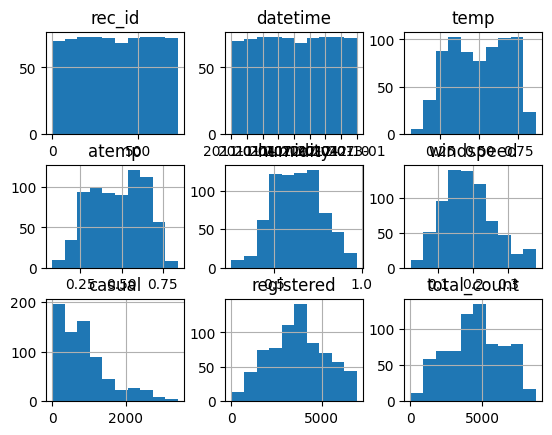

In [73]:
day_df.hist()

In [74]:
day_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.991738,0.114191,-0.140169,0.539714,0.538095,0.625892
atemp,0.991738,1.000000,0.126587,-0.166038,0.540234,0.541977,0.629204
humidity,0.114191,0.126587,1.000000,-0.204496,-0.101439,-0.124701,-0.136621
windspeed,-0.140169,-0.166038,-0.204496,1.000000,-0.146178,-0.203677,-0.216193
casual,0.539714,0.540234,-0.101439,-0.146178,1.000000,0.389848,0.670547
registered,0.538095,0.541977,-0.124701,-0.203677,0.389848,1.000000,0.944581
total_count,0.625892,0.629204,-0.136621,-0.216193,0.670547,0.944581,1.000000


### Explore `hour_df`

In [75]:
hour_df.sample(5)

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
8719,8720,2012-01-04,Spring,2012,Jan,3,0,Wed,1,Clear,0.02,0.0152,0.34,0.2836,0,1,1
2731,2732,2011-04-28,Summer,2011,Apr,17,0,Thu,1,Clear,0.64,0.6212,0.47,0.3582,49,406,455
2755,2756,2011-04-29,Summer,2011,Apr,17,0,Fri,1,Misty,0.52,0.5000,0.45,0.3881,75,433,508
10774,10775,2012-03-30,Summer,2012,Mar,1,0,Fri,1,Clear,0.38,0.3939,0.50,0.2836,6,21,27
2779,2780,2011-04-30,Summer,2011,Apr,17,0,Sat,0,Clear,0.56,0.5303,0.43,0.1343,162,245,407


In [76]:
hour_df.describe(include="all")

,rec_id,datetime,season,year,month,hour,is_holiday,weekday,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17016.000000,17016,17016,17016,17016,17016.0,17016.0,17016,17016.0,17016,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000,17016.000000
unique,NaN,NaN,4,2,12,24.0,2.0,7,2.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,2012,Jul,7.0,0.0,Sun,1.0,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,4460,8559,1479,725.0,16524.0,2462,11618.0,11184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8719.636460,2012-01-03 09:56:31.819464192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.498235,0.477199,0.630960,0.182814,35.784262,154.048895,189.833157
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4393.750000,2011-07-06 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8697.500000,2012-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500000,0.484800,0.635000,0.164200,17.000000,116.000000,142.000000
75%,13075.250000,2012-07-03 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.660000,0.621200,0.790000,0.253700,48.250000,221.000000,282.000000
max,17379.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.462700,367.000000,886.000000,977.000000


array([[<Axes: title={'center': 'rec_id'}>,
        <Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'total_count'}>]], dtype=object)

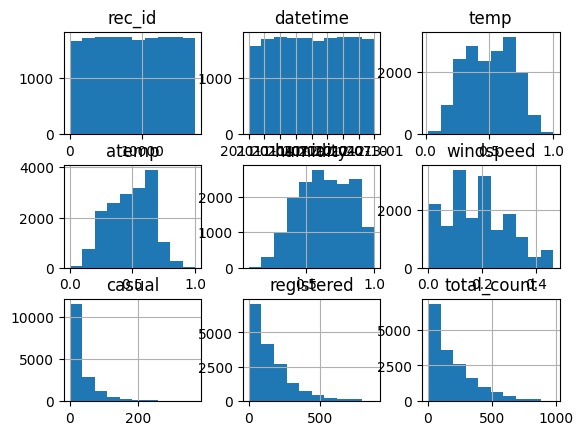

In [77]:
hour_df.hist()

In [78]:
hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()

,temp,atemp,humidity,windspeed,casual,registered,total_count
temp,1.000000,0.987824,-0.081344,-0.006237,0.458015,0.333060,0.402467
atemp,0.987824,1.000000,-0.064554,-0.043931,0.452487,0.330158,0.398543
humidity,-0.081344,-0.064554,1.000000,-0.274061,-0.358537,-0.284323,-0.334750
windspeed,-0.006237,-0.043931,-0.274061,1.000000,0.105741,0.095456,0.108408
casual,0.458015,0.452487,-0.358537,0.105741,1.000000,0.506163,0.694282
registered,0.333060,0.330158,-0.284323,0.095456,0.506163,1.000000,0.972119
total_count,0.402467,0.398543,-0.334750,0.108408,0.694282,0.972119,1.000000


## Visualization & Explanatory Analysis

### Pertanyaan 1: Kapan terjadi bike rental tertinggi? Musim apa? Bulan apa? Hari apa? Jam berapa?

#### Visualize `hour_df`

[Text(0.5, 1.0, 'Weekday wise hourly distribution of counts')]

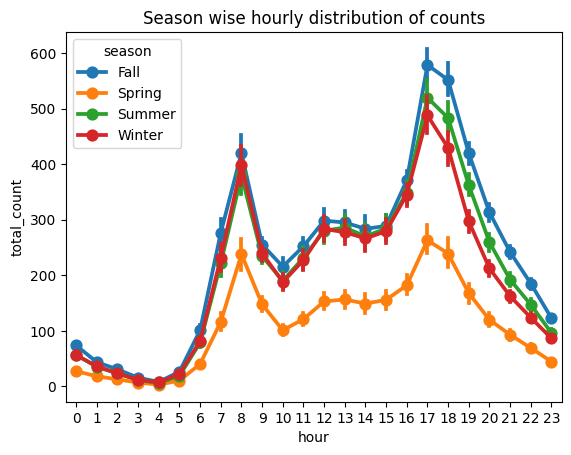

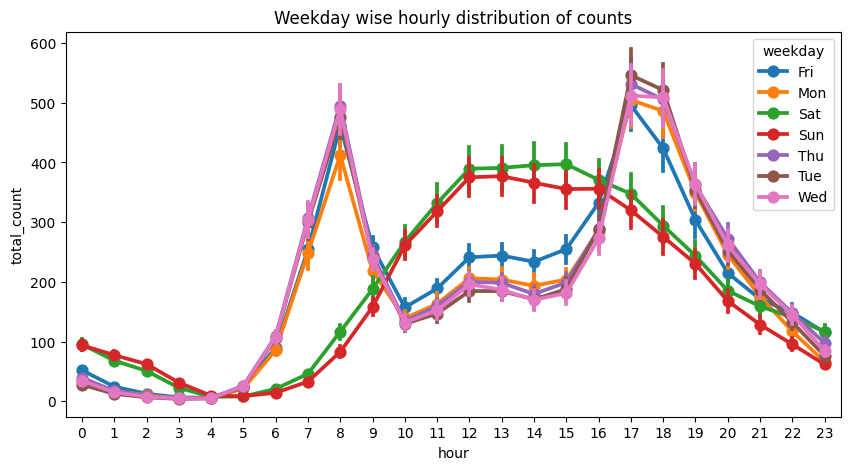

In [79]:
### `hour_df`
# visualizing hourly ridership counts across the seasons
fig,ax = plt.subplots()
sns.pointplot(
    data=hour_df[['hour','total_count','season']],
    x='hour',
    y='total_count',
    hue='season',
    ax=ax
)
ax.set(title="Season wise hourly distribution of counts")

fig,ax = plt.subplots(figsize=(10, 5))
sns.pointplot(
    data=hour_df[['hour','total_count','weekday']],
    x='hour',
    y='total_count',
    hue='weekday',
    ax=ax
)
ax.set(title="Weekday wise hourly distribution of counts")

#### Visualize `day_df`

[Text(0.5, 1.0, 'Monthly distribution of counts')]

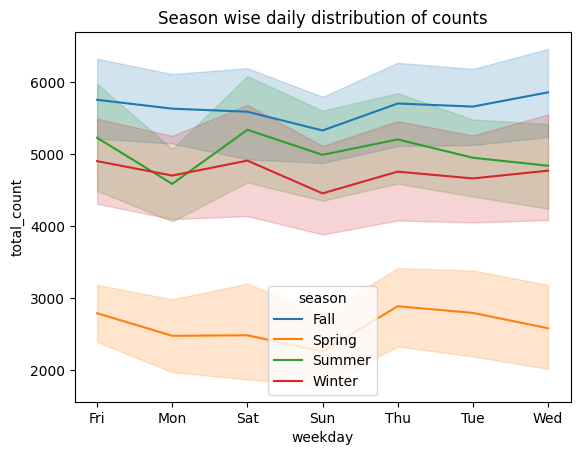

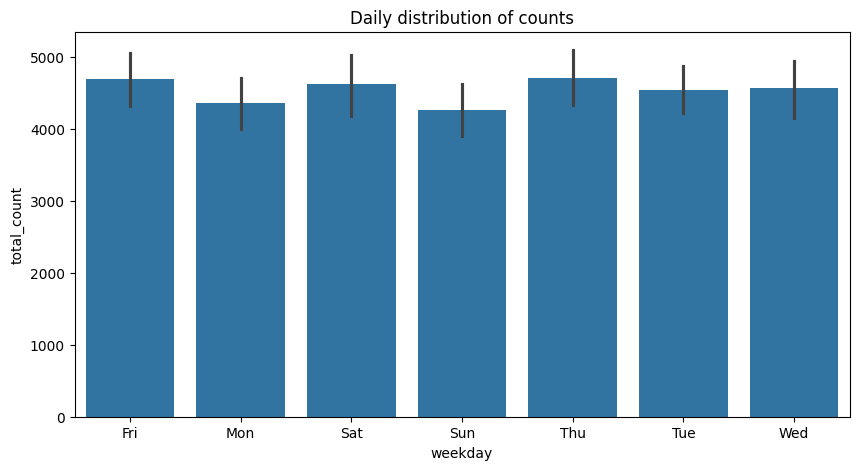

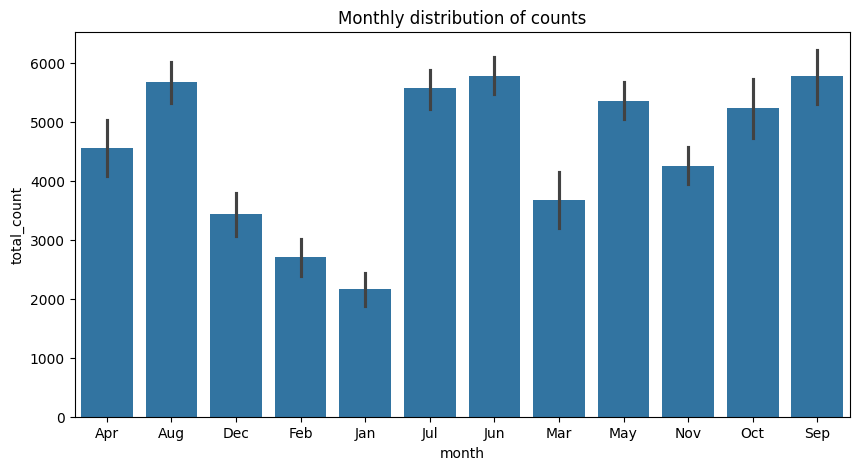

In [80]:
### `day_df`
# visualizing daily ridership counts across the seasons
fig,ax = plt.subplots()
sns.lineplot(
    data=day_df[['weekday','total_count','season']],
    x='weekday',
    y='total_count',
    hue='season',
    ax=ax
)
ax.set(title="Season wise daily distribution of counts")

fig,ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=day_df[['weekday','total_count']],
    x="weekday",
    y="total_count"
)
ax.set(title="Daily distribution of counts")

fig,ax = plt.subplots(figsize=(10, 5))
sns.barplot(
    data=day_df[['month','total_count']],
    x="month",
    y="total_count"
)
ax.set(title="Monthly distribution of counts")

### Pertanyaan 2: Apa faktor yang paling mempengaruhi jumlah bike rental?

#### Visualize `day_df`

registered & casual, menunjukkan strong correlation terhadap total_count


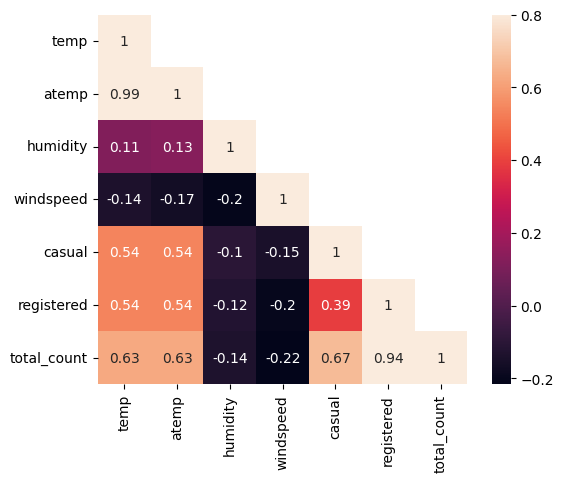

In [81]:
### `day_df`
corrMatt = day_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(
    corrMatt,
    mask=mask,
    vmax=.8,
    square=True,
    annot=True
)

print("registered & casual, menunjukkan strong correlation terhadap total_count")

#### Visualize `hour_df`

registered & casual, menunjukkan strong correlation terhadap total_count


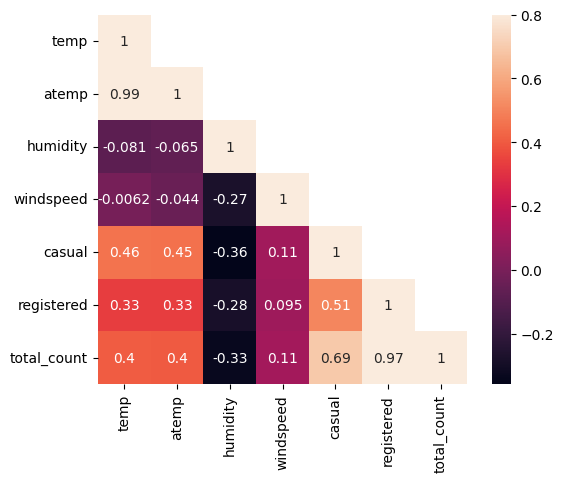

In [82]:
### `hour_df`
corrMatt = hour_df[["temp","atemp","humidity","windspeed","casual","registered","total_count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False

sns.heatmap(
    corrMatt,
    mask=mask,
    vmax=.8,
    square=True,
    annot=True
)

print("registered & casual, menunjukkan strong correlation terhadap total_count")

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2

## Menerapkan teknik analisis lanjutan

### 1. Clustering Analysis

Dilakukan clustering analysis untuk melihat jumlah bike sharing pada hari libur & hari kerja

#### Analize `day_df`

In [83]:
### `day_df`
day_df.groupby(by="is_holiday").total_count.nunique().sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_4772\2308659030.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="is_holiday").total_count.nunique().sort_values(ascending=False)


is_holiday
0    667
1     20
Name: total_count, dtype: int64

In [84]:
### `day_df`
day_df.groupby(by="is_workingday").agg({"total_count": ["count"]})

C:\Users\user\AppData\Local\Temp\ipykernel_4772\1616396320.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="is_workingday").agg({"total_count": ["count"]})


,total_count
,count
is_workingday,
0,226
1,491


#### Analize `hour_df`

In [85]:
### `hour_df`
hour_df.groupby(by="is_holiday").total_count.nunique().sort_values(ascending=False)

C:\Users\user\AppData\Local\Temp\ipykernel_4772\2275409170.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="is_holiday").total_count.nunique().sort_values(ascending=False)


is_holiday
0    868
1    273
Name: total_count, dtype: int64

In [86]:
### `hour_df`
hour_df.groupby(by="is_workingday").agg({"total_count": ["count"]})

C:\Users\user\AppData\Local\Temp\ipykernel_4772\164268161.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="is_workingday").agg({"total_count": ["count"]})


,total_count
,count
is_workingday,
0,5398
1,11618


### 2. RFM Analysis

Dilakukan RFM Analysis untuk memahami perilaku pelanggan (registered & casual) dari tiga faktor utama:
1. Recency (seberapa baru pelanggan berinteraksi dengan bisnis)
2. Frequency (banyaknya pelanggan dalam berinteraksi)
3. Monetary (banyaknya uang yang mereka gunakan)

#### Analize `day_df`

In [87]:
current_date = max(day_df['datetime'])
rfm_df = day_df.groupby('registered').agg({
    'datetime': lambda x: (current_date - x.max()).days,  # Recency
    'rec_id': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print("Registered Customer:")
print(rfm_df.head())

Registered Customer:
   registered  Recency  Frequency  Monetary
0          20       63          1        22
1         416      704          1       431
2         432        5          1       441
3         451      372          1       754
4         472      705          1       506


In [88]:
current_date = max(day_df['datetime'])
rfm_df = day_df.groupby('casual').agg({
    'datetime': lambda x: (current_date - x.max()).days,  # Recency
    'rec_id': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['casual', 'Recency', 'Frequency', 'Monetary']

print("Casual Customer:")
print(rfm_df.head())

Casual Customer:
   casual  Recency  Frequency  Monetary
0       2       63          1        22
1       9        5          2      1124
2      15      704          1       431
3      25      719          1      1162
4      34      705          1       506


#### Analize `hour_df`

In [89]:
current_date = max(hour_df['datetime'])
rfm_df = hour_df.groupby('registered').agg({
    'datetime': lambda x: (current_date - x.max()).days,  # Recency
    'rec_id': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

print("Registered Customer:")
print(rfm_df.head())

Registered Customer:
   registered  Recency  Frequency  Monetary
0           0       38         22        31
1           1        0        192       284
2           2        1        238       628
3           3        0        293      1150
4           4        3        307      1602


In [90]:
current_date = max(hour_df['datetime'])
rfm_df = hour_df.groupby('casual').agg({
    'datetime': lambda x: (current_date - x.max()).days,  # Recency
    'rec_id': 'count',  # Frequency
    'total_count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['casual', 'Recency', 'Frequency', 'Monetary']

print("Casual Customer:")
print(rfm_df.head())

Casual Customer:
   casual  Recency  Frequency  Monetary
0       0        0       1547     20399
1       1        1       1052     26409
2       2        0        779     28487
3       3        0        691     38310
4       4        0        545     36304
